In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### VA BT Real

In [2]:
username = 'B28658' # insert your username
path = f'C:/Users/{username}/Novo Banco S.A/GVM Team - General/13_VaR/Validação/2023/03_ANALISES/Backtesting_e_Carteira_AnaliseGVM.xlsx'

df = pd.read_excel(path, sheet_name='VA_BT Real')
df.head()

,BT Real 1d TRD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,BT Real 1d IP,Unnamed: 8,Unnamed: 9,...,DIFERENÇAS ENTRE PL TEORICO E REAL,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Data,P&L1d,VaR99%1d,Exceções,PL teorico,NaN,NaN,Data,P&L1d,VaR99%1d,...,TRD,IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-31 00:00:00,0.063525,-0.430092,NaN,nd,NaN,NaN,2021-12-31 00:00:00,-2.47725,-8.489705,...,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-03 00:00:00,0.063365,-0.425183,NaN,nd,NaN,NaN,2022-01-03 00:00:00,-2.47725,-8.477055,...,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-04 00:00:00,0.07487,-0.411287,NaN,nd,NaN,NaN,2022-01-04 00:00:00,-2.47725,-8.427055,...,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-05 00:00:00,0.070997,-0.437205,NaN,nd,NaN,NaN,2022-01-05 00:00:00,-2.47725,-8.095102,...,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BT Real 1d TRD                      289 non-null    object 
 1   Unnamed: 1                          289 non-null    object 
 2   Unnamed: 2                          289 non-null    object 
 3   Unnamed: 3                          2 non-null      object 
 4   Unnamed: 4                          71 non-null     object 
 5   Unnamed: 5                          1 non-null      object 
 6   Unnamed: 6                          1 non-null      float64
 7   BT Real 1d IP                       289 non-null    object 
 8   Unnamed: 8                          289 non-null    object 
 9   Unnamed: 9                          289 non-null    object 
 10  Unnamed: 10                         6 non-null      object 
 11  Unnamed: 11                         70 non-nu

In [4]:
named_columns = [col for col in df.columns if not col.startswith('Unnamed')]

dfs = []

for i, col in enumerate(named_columns):
    start_col = col
    end_col = named_columns[i + 1] if i + 1 < len(named_columns) else None
    if end_col:
        df_part = df.loc[:, start_col:end_col].drop(columns=[end_col])
    else:
        df_part = df.loc[:, start_col:]

    df_part.columns = df_part.iloc[0]
    df_part = df_part[1:]

    dfs.append(df_part)

df_bt_real_1d_trp, df_bt_real_1d_ip, df_diff_pl_teo_real = dfs

In [5]:
dfs[0].columns

Index(['Data', 'P&L1d', 'VaR99%1d', 'Exceções', 'PL teorico', nan, nan], dtype='object', name=0)

In [6]:
import matplotlib.pyplot as plt

def plot_data(df, title):
    df = df[['Data', 'P&L1d', 'VaR99%1d', 'Exceções']]
    df[['P&L1d', 'VaR99%1d', 'Exceções']] = df[['P&L1d', 'VaR99%1d', 'Exceções']].astype(float)
    df['Data'] = pd.to_datetime(df['Data'])

    plt.figure(figsize=(12, 8))

    # Plotando as colunas restantes
    for column in df.columns:
        if column != 'Data':
            plt.plot(df['Data'], df[column], label=column, linewidth=1.5)

    # Identificando e anotando os pontos de 'breach'
    breaches = df[df['P&L1d'] < df['VaR99%1d']]
    for idx, row in breaches.iterrows():
        plt.plot(row['Data'], row['P&L1d'], 'ro')  # Ponto vermelho
        excessao_valor = round(row['P&L1d'], 2)
        plt.annotate(f'{excessao_valor}\n{row["Data"].date()}',
                      (row['Data'], row['P&L1d']),
                      textcoords="offset points",
                      xytext=(0,-22),
                      ha='center', color='red', fontsize=8)

    # Configuração do layout
    plt.title(title, fontsize=16)
    plt.xlabel('Data', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.savefig(f"{title}.png", dpi=300)
    plt.show()

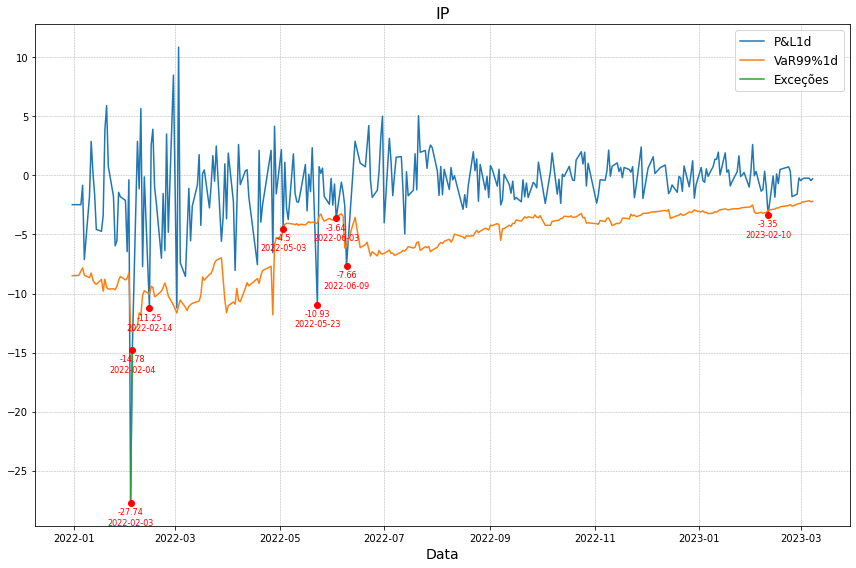

In [7]:
plot_data(dfs[1], "IP")

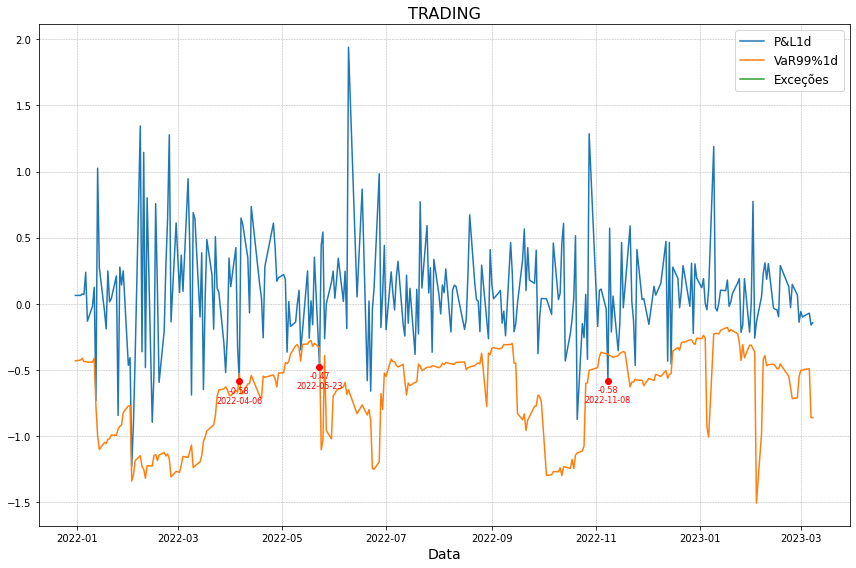

In [8]:
plot_data(dfs[0], "TRADING")

# VA BT Teórico

In [9]:
df_bt_teorico = pd.read_excel(path, sheet_name='VA_BT Teórico')

In [10]:
df_bt_teorico

,BT Teórico 1d TRD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,BT Teórico 1d IP,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Data,P&L1d,VaR99%1d,Exceções,NaN,Data,P&L1d,VaR99%1d,Exceções,NaN,NaN
1,1900-01-14 00:00:00,0.268597,-0.679544,NaN,NaN,2022-04-07 00:00:00,-4.82368,-10.58808,NaN,NaN,NaN
2,2022-04-08 00:00:00,-0.037182,-0.677946,NaN,NaN,2022-04-08 00:00:00,-2.984014,-10.690104,NaN,NaN,NaN
3,2022-04-11 00:00:00,0.029345,-0.60488,NaN,NaN,2022-04-11 00:00:00,-1.013816,-9.542834,NaN,NaN,NaN
4,2022-04-12 00:00:00,0.154216,-0.602177,NaN,NaN,2022-04-12 00:00:00,3.209153,-9.077901,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
215,2023-03-02 00:00:00,-0.021768,-0.502225,NaN,NaN,2023-03-02 00:00:00,-0.016449,-2.249309,NaN,NaN,NaN
216,2023-03-03 00:00:00,-0.357492,-0.4954,NaN,NaN,2023-03-03 00:00:00,-1.505228,-2.238506,NaN,NaN,NaN
217,2023-03-06 00:00:00,-0.40067,-0.490344,NaN,NaN,2023-03-06 00:00:00,0.224385,-2.143196,NaN,NaN,NaN
218,2023-03-07 00:00:00,0.219514,-0.85901,NaN,NaN,2023-03-07 00:00:00,-0.044494,-2.236248,NaN,NaN,NaN


In [11]:
named_columns = [col for col in df_bt_teorico.columns if not col.startswith('Unnamed')]

dfs = []

for i, col in enumerate(named_columns):
    start_col = col
    end_col = named_columns[i + 1] if i + 1 < len(named_columns) else None
    if end_col:
        df_part = df_bt_teorico.loc[:, start_col:end_col].drop(columns=[end_col])
    else:
        df_part = df_bt_teorico.loc[:, start_col:]

    df_part.columns = df_part.iloc[0]
    df_part = df_part[1:]
    df_part['Data'] = pd.to_datetime(df_part['Data'])
    df_part[['P&L1d', 'VaR99%1d', 'Exceções']] = df_part[['P&L1d', 'VaR99%1d', 'Exceções']].astype(float)
    df_part = df_part[['Data', 'P&L1d', 'VaR99%1d', 'Exceções']]

    dfs.append(df_part)

df_trd, df_ip = dfs

In [12]:
df_ip

,Data,P&L1d,VaR99%1d,Exceções
1,2022-04-07,-4.823680,-10.588080,NaN
2,2022-04-08,-2.984014,-10.690104,NaN
3,2022-04-11,-1.013816,-9.542834,NaN
4,2022-04-12,3.209153,-9.077901,NaN
5,2022-04-13,-2.188499,-9.347647,NaN
...,...,...,...,...
215,2023-03-02,-0.016449,-2.249309,NaN
216,2023-03-03,-1.505228,-2.238506,NaN
217,2023-03-06,0.224385,-2.143196,NaN
218,2023-03-07,-0.044494,-2.236248,NaN


In [13]:
def plot_data_v2(df, title):
    plt.figure(figsize=(12, 8))

    # Plotando as colunas restantes
    for column in df.columns:
        if column not in ['Data', 'Exceções']:
            plt.plot(df['Data'], df[column], label=column, linewidth=1.5)

    # Identificando e anotando os pontos de 'breach'
    breaches = df[df['P&L1d'] < df['VaR99%1d']]
    for idx, row in breaches.iterrows():
        plt.plot(row['Data'], row['P&L1d'], 'ro')  # Ponto vermelho
        excessao_valor = round(row['P&L1d'], 2)
        # Linha vertical tracejada
        plt.axvline(x=row['Data'], color='grey', linestyle='--', linewidth=0.8)
        plt.annotate(f'{excessao_valor}\n{row["Data"].date()}',
                      (row['Data'], row['P&L1d']),
                      textcoords="offset points",
                      xytext=(0,-22),
                      ha='center', color='red', fontsize=8)

    # Configuração do layout
    plt.title(title, fontsize=16)
    plt.xlabel('Data', fontsize=14)
    plt.ylabel('Valores', fontsize=14)
    plt.legend(fontsize=12)
    # plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.savefig(f"{title}.png", dpi=300)
    plt.show()


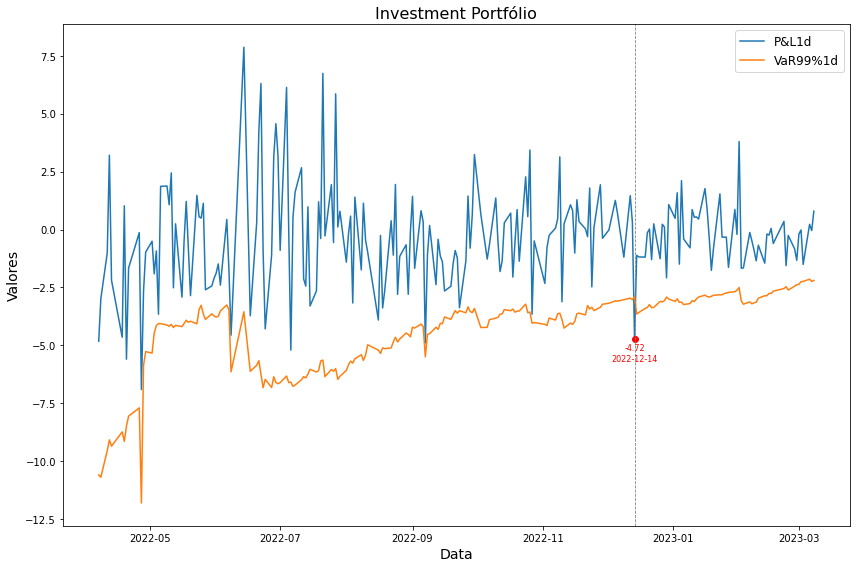

In [14]:
plot_data_v2(df_ip, 'Investment Portfólio')

In [15]:
df_trd

,Data,P&L1d,VaR99%1d,Exceções
1,1900-01-14,0.268597,-0.679544,NaN
2,2022-04-08,-0.037182,-0.677946,NaN
3,2022-04-11,0.029345,-0.604880,NaN
4,2022-04-12,0.154216,-0.602177,NaN
5,2022-04-13,0.380419,-0.541202,NaN
...,...,...,...,...
215,2023-03-02,-0.021768,-0.502225,NaN
216,2023-03-03,-0.357492,-0.495400,NaN
217,2023-03-06,-0.400670,-0.490344,NaN
218,2023-03-07,0.219514,-0.859010,NaN


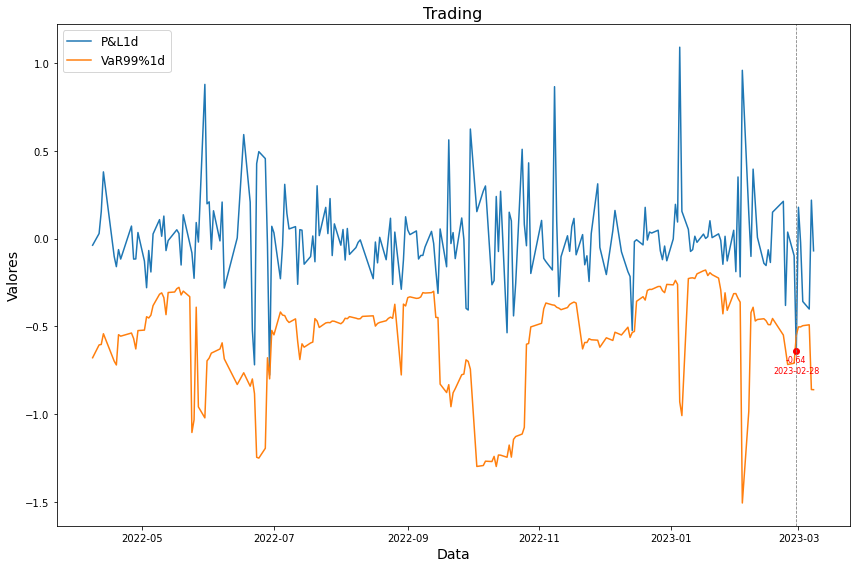

In [16]:
plot_data_v2(df_trd[df_trd['Data'] >= '2022-01-31'], 'Trading')

### BT

In [17]:
df_bt = pd.read_excel(path, sheet_name='BT')

In [18]:
df_bt

,BT Teórico 1d TRD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,BT Real 1d TRD,Unnamed: 6,Unnamed: 7,Unnamed: 8,>Abs(0.5M€),...,Unnamed: 20,Unnamed: 21,Unnamed: 22,>Abs(1M€),Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Data,P&L1d,VaR99%1d,Exceções,NaN,Data,P&L1d,VaR99%1d,Exceções,Diff,...,P&L1d,VaR99%1d,Exceções,Diff,Comments,NaN,NaN,NaN,NaN,NaN
1,2023-03-09 00:00:00,-0.155256,-0.788398,NaN,NaN,2023-03-09 00:00:00,-0.049,-0.788398,NaN,0.106256,...,3.14,-2.249796,NaN,0.893783,Diffs below materiality threshold,NaN,NaN,NaN,NaN,NaN
2,2023-03-10 00:00:00,0.301849,-0.785264,NaN,NaN,2023-03-10 00:00:00,0.128,-0.785264,NaN,-0.173849,...,5.658,-2.416994,NaN,-0.181548,Diffs below materiality threshold,NaN,NaN,NaN,Model Assumptions:,NaN
3,2023-03-13 00:00:00,-0.270836,-0.858695,NaN,NaN,2023-03-13 00:00:00,0.249,-0.858695,NaN,0.519836,...,-5.491,-6.83,NaN,-0.418027,Diffs below materiality threshold,NaN,NaN,NaN,#1,Benchmark yield curves for corporate bonds
4,2023-03-14 00:00:00,0.406336,-0.807865,NaN,NaN,2023-03-14 00:00:00,0.177,-0.807865,NaN,-0.229336,...,-6.633,-6.74,NaN,-15.569007,Diff Explained:\nModel assumption #1: P&L Teor...,NaN,NaN,NaN,#2,Proxy booking for Caps&Floors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2023-11-14 00:00:00,0.548777,-1.70524,NaN,NaN,2023-11-14 00:00:00,0.154,-1.70524,NaN,-0.394777,...,-0.164,-3.326189,NaN,-1.193603,Diff Explained:\nModel assumption #1: P&L Teor...,NaN,NaN,NaN,NaN,NaN
163,2023-11-15 00:00:00,-0.568624,-1.790739,NaN,NaN,2023-11-15 00:00:00,-0.005545,-1.790739,NaN,0.563079,...,1.5738,-3.174965,NaN,0.789491,Diffs below materiality threshold,NaN,NaN,NaN,NaN,NaN
164,2023-11-16 00:00:00,-0.088863,-1.896332,NaN,NaN,2023-11-16 00:00:00,-0.064238,-1.896332,NaN,0.024626,...,-0.161,-2.859292,NaN,-0.384385,Diffs below materiality threshold,NaN,NaN,NaN,NaN,NaN
165,2023-11-17 00:00:00,0.048161,-1.718356,NaN,NaN,2023-11-17 00:00:00,-0.012673,-1.718356,NaN,-0.060834,...,-0.358,-2.873614,NaN,-0.096177,Diffs below materiality threshold,NaN,NaN,NaN,NaN,NaN


In [19]:
df_ip

,Data,P&L1d,VaR99%1d,Exceções
1,2022-04-07,-4.823680,-10.588080,NaN
2,2022-04-08,-2.984014,-10.690104,NaN
3,2022-04-11,-1.013816,-9.542834,NaN
4,2022-04-12,3.209153,-9.077901,NaN
5,2022-04-13,-2.188499,-9.347647,NaN
...,...,...,...,...
215,2023-03-02,-0.016449,-2.249309,NaN
216,2023-03-03,-1.505228,-2.238506,NaN
217,2023-03-06,0.224385,-2.143196,NaN
218,2023-03-07,-0.044494,-2.236248,NaN


In [20]:
df_ip.dtypes

0
Data        datetime64[ns]
P&L1d              float64
VaR99%1d           float64
Exceções           float64
dtype: object

http://127.0.0.1:8050/

In [21]:
import plotly.graph_objects as go
import plotly.express as px
import datetime
from ipywidgets import interact, widgets


def update_graph(start_date, end_date, selected_columns):
    filtered_df = df_ip[(df_ip['Data'] >= pd.to_datetime(start_date)) & (df_ip['Data'] <= pd.to_datetime(end_date))]
    
    if not selected_columns:
        selected_columns = ['P&L1d'] 
    
    fig = go.Figure()
    
    for column in selected_columns:
        fig.add_trace(go.Scatter(x=filtered_df['Data'], y=filtered_df[column], mode='lines', name=column))
    
    if 'P&L1d' in selected_columns and 'VaR99%1d' in selected_columns:
        breaches = filtered_df[filtered_df['P&L1d'] < filtered_df['VaR99%1d']]
        fig.add_trace(go.Scatter(
            x=breaches['Data'], 
            y=breaches['P&L1d'], 
            mode='markers+text',
            marker=dict(color='red', size=10),
            text=[f'{round(val, 2)}\n{date.date()}' for val, date in zip(breaches['P&L1d'], breaches['Data'])],
            textposition='bottom center',
            name='Breaches'
        ))

    fig.update_layout(
        title='Investiment Portfolio (IP)',
        xaxis_title='Data',
        yaxis_title='Valores',
        legend_title='Colunas',
        template='plotly_white'
    )
    
    fig.show()

# Widgets interativos
start_date_picker = widgets.DatePicker(
    description='Start Date',
    value=datetime.date(2023, 1, 1),
    disabled=False
)

end_date_picker = widgets.DatePicker(
    description='End Date',
    value=datetime.date(2023, 4, 10),
    disabled=False
)

column_selector = widgets.SelectMultiple(
    options=['P&L1d', 'VaR99%1d', 'Exceções'],
    value=['P&L1d', 'VaR99%1d'],
    description='Columns',
    disabled=False
)

# Interativo
interact(
    update_graph,
    start_date=start_date_picker,
    end_date=end_date_picker,
    selected_columns=column_selector
)


interactive(children=(DatePicker(value=datetime.date(2023, 1, 1), description='Start Date'), DatePicker(value=…

<function __main__.update_graph(start_date, end_date, selected_columns)>

In [22]:
import plotly.graph_objects as go
import plotly.express as px
import datetime
from ipywidgets import interact, widgets
from plotly.subplots import make_subplots

def update_graph(date_range, selected_columns):
    start_date, end_date = date_range
    filtered_df = df_ip[(df_ip['Data'] >= pd.to_datetime(start_date)) & (df_ip['Data'] <= pd.to_datetime(end_date))]
    
    if not selected_columns:
        selected_columns = ['P&L1d'] 
    
    fig = go.Figure()
    
    for column in selected_columns:
        fig.add_trace(go.Scatter(x=filtered_df['Data'], y=filtered_df[column], mode='lines', name=column))
    
    if 'P&L1d' in selected_columns and 'VaR99%1d' in selected_columns:
        breaches = filtered_df[filtered_df['P&L1d'] < filtered_df['VaR99%1d']]
        fig.add_trace(go.Scatter(
            x=breaches['Data'], 
            y=breaches['P&L1d'], 
            mode='markers+text',
            marker=dict(color='red', size=10),
            text=[f'{round(val, 2)}\n{date.date()}' for val, date in zip(breaches['P&L1d'], breaches['Data'])],
            textposition='bottom center',
            name='Breaches'
        ))

    fig.update_layout(
        title='Investiment Portfolio (IP)',
        xaxis_title='Data',
        yaxis_title='Valores',
        legend_title='Colunas',
        template='plotly_white',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )
    
    fig.show()

date_range_slider = widgets.SelectionRangeSlider(
    options=[pd.to_datetime(d).date() for d in df_ip['Data']],
    index=(0, len(df_ip) - 1),
    description='Date Range',
    orientation='horizontal',
    layout={'width': '800px'}
)

column_selector = widgets.SelectMultiple(
    options=['P&L1d', 'VaR99%1d', 'Exceções'],
    value=['P&L1d', 'VaR99%1d'],
    description='Columns',
    disabled=False
)

interact(
    update_graph,
    date_range=date_range_slider,
    selected_columns=column_selector
)


interactive(children=(SelectionRangeSlider(description='Date Range', index=(0, 218), layout=Layout(width='800p…

<function __main__.update_graph(date_range, selected_columns)>